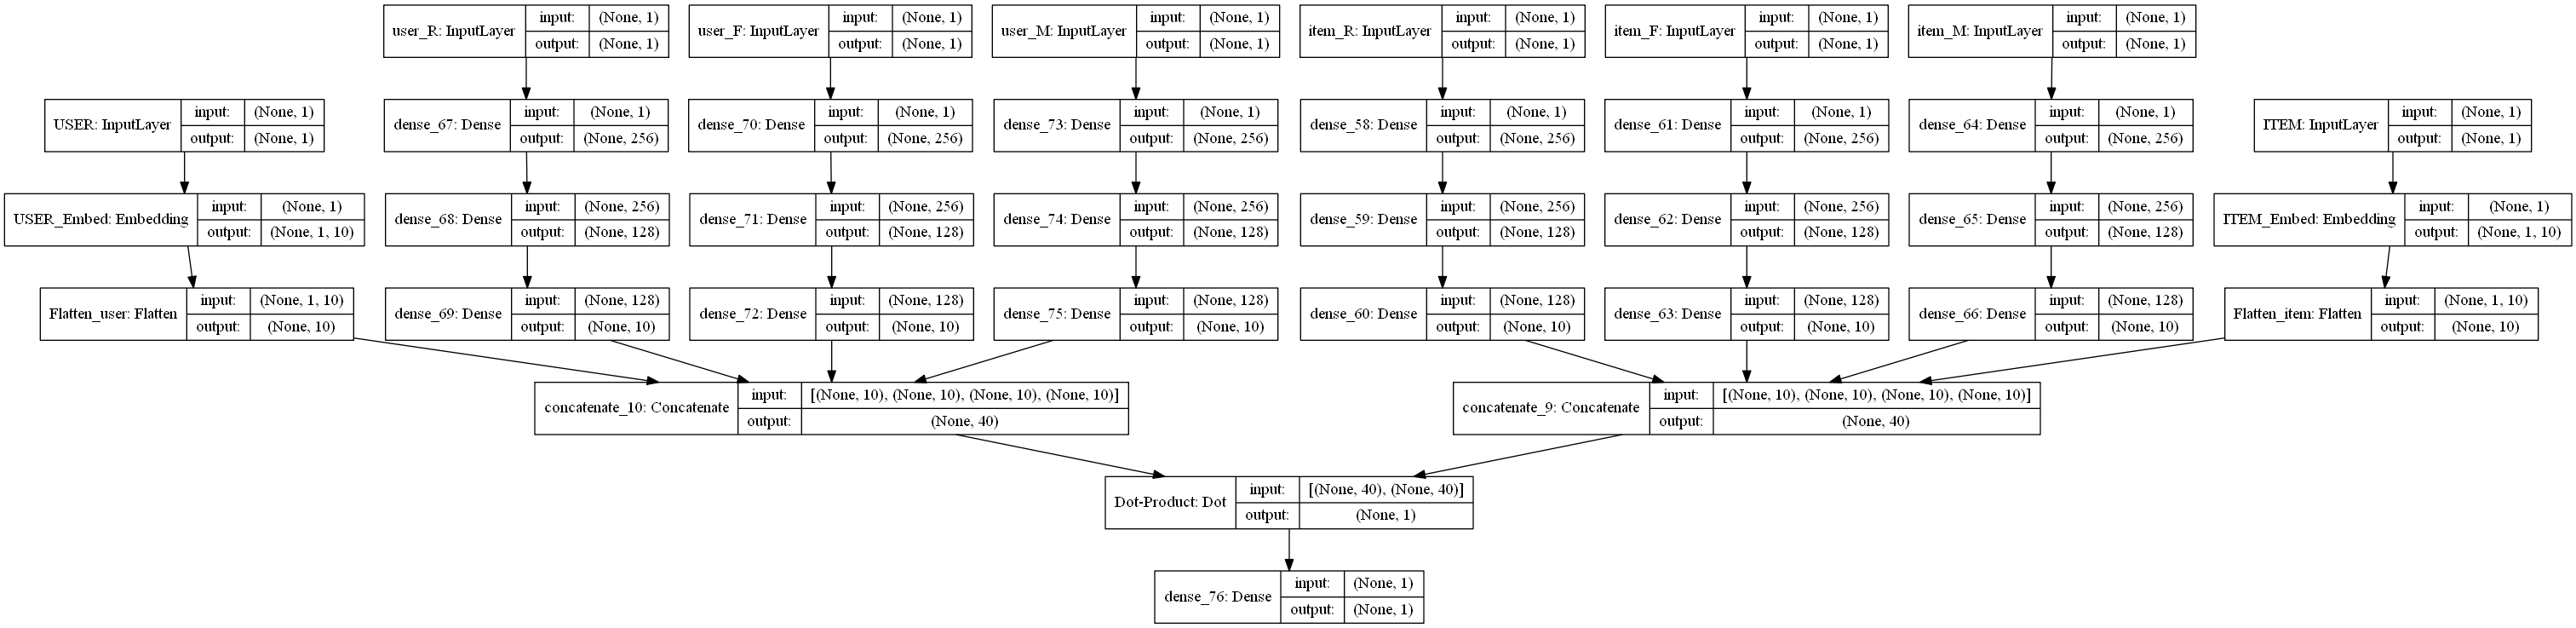

In [1]:
import os
import pandas as pd
import numpy as np
from keras.layers import Input, Embedding, Flatten, Dot, Dense, concatenate, Activation, BatchNormalization
from keras.models import Model, model_from_json
from keras.initializers import glorot_normal
from sklearn.model_selection import GridSearchCV
import h5py
import talos as ta

from keras.utils import plot_model
from IPython.display import Image

Using TensorFlow backend.


In [4]:
U_RFM = buyer_RFM[["buyer", "recency.1", "freq.1", "amount.1"]]
I_RFM = item_RFM[["product", "recency.1", "freq.1", "amount.1"]]

In [5]:
U_RFM.columns = "user", "user_R", "user_F", "user_M"
I_RFM.columns = "item", "item_R", "item_F", "item_M"

In [7]:
raw = raw.loc[:,["buyer","product","created"]]
raw["created"] = pd.to_datetime(raw.created)
raw["created"] = [x.month for x in raw["created"]]
raw.columns = ["user","item","month"]
print(raw.shape)
raw.head()

(243169, 3)


,user,item,month
0,34990,1047047,7
1,54804,940522,7
2,54804,1029752,7
3,54804,1045597,7
4,54804,1066000,7


In [8]:
from sklearn.metrics import roc_curve

In [9]:
from keras.optimizers import Adam
from keras.optimizers import rmsprop

In [10]:
from keras.optimizers import Adam
from keras.optimizers import rmsprop

s = 7
top_n=10
user_factor = 27
item_factor = 27
factors = 9

BATCH_SIZE = 256
LEARNING_RATE = .0001
epo = 40
rfm_dense1 = 32
dot_dense1 = 16
dot_dense2 = 8
optimizer = Adam(lr = LEARNING_RATE)

In [11]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

################### trained by 7 and predict 8
Train on 75096 samples, validate on 18774 samples
Epoch 1/40
75096/75096 [==============================] - ETA: 30:47 - loss: 0.71 - ETA: 5:05 - loss: 0.7107 - ETA: 2:44 - loss: 0.707 - ETA: 2:00 - loss: 0.706 - ETA: 1:34 - loss: 0.705 - ETA: 1:13 - loss: 0.703 - ETA: 1:00 - loss: 0.702 - ETA: 49s - loss: 0.700 - ETA: 45s - loss: 0.69 - ETA: 40s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 32s - loss: 0.69 - ETA: 28s - loss: 0.69 - ETA: 26s - loss: 0.69 - ETA: 23s - loss: 0.69 - ETA: 21s - loss: 0.68 - ETA: 19s - loss: 0.68 - ETA: 17s - loss: 0.68 - ETA: 16s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 13s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 10s - loss: 0.67 - ETA: 10s - loss: 0.67 - ETA: 9s - loss: 0.6775 - ETA: 8s - loss: 0.676 - ETA: 8s - loss: 0.675 - ETA: 7s - loss: 0.674 - ETA: 6s - loss: 0.673 - ETA: 6s - loss: 0.672 - ETA: 5s - loss: 0.671 - ETA: 5s - lo

75096/75096 [==============================] - ETA: 4s - loss: 0.030 - ETA: 2s - loss: 0.047 - ETA: 3s - loss: 0.041 - ETA: 2s - loss: 0.039 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.043 - ETA: 2s - loss: 0.041 - ETA: 2s - loss: 0.041 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.039 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.039 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.041 - ETA: 2s - loss: 0.041 - ETA: 2s - loss: 0.041 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.041 - ETA: 1s - loss: 0.040 - ETA: 1s - loss: 0.040 - ETA: 1s - loss: 0.040 - ETA: 1s - loss: 0.040 - ETA: 1s - loss: 0.040 - ETA: 1s - loss: 0.039 - ETA: 1s - loss: 0.039 - ETA: 1s - loss: 0.039 - ETA: 1s - loss: 0.039 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.039 - ETA: 1s - loss: 0.039 - ETA: 0s - loss: 0.039 - ETA: 0s - loss: 0

Epoch 16/40
75096/75096 [==============================] - ETA: 3s - loss: 0.027 - ETA: 3s - loss: 0.023 - ETA: 3s - loss: 0.032 - ETA: 3s - loss: 0.036 - ETA: 3s - loss: 0.039 - ETA: 3s - loss: 0.040 - ETA: 3s - loss: 0.043 - ETA: 3s - loss: 0.041 - ETA: 3s - loss: 0.044 - ETA: 3s - loss: 0.042 - ETA: 3s - loss: 0.040 - ETA: 3s - loss: 0.040 - ETA: 2s - loss: 0.037 - ETA: 2s - loss: 0.038 - ETA: 2s - loss: 0.038 - ETA: 2s - loss: 0.037 - ETA: 2s - loss: 0.038 - ETA: 2s - loss: 0.038 - ETA: 2s - loss: 0.038 - ETA: 2s - loss: 0.037 - ETA: 2s - loss: 0.037 - ETA: 2s - loss: 0.037 - ETA: 2s - loss: 0.038 - ETA: 2s - loss: 0.039 - ETA: 2s - loss: 0.038 - ETA: 2s - loss: 0.038 - ETA: 2s - loss: 0.038 - ETA: 2s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.038 - ETA: 1s - loss: 0.039 - ETA: 1s - loss: 0.039 - ETA: 

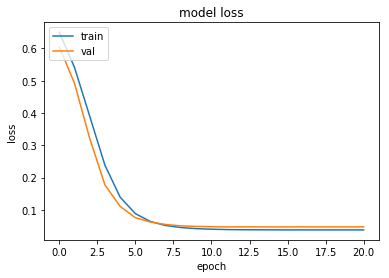

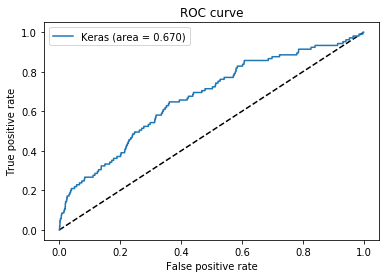

auc :  0.669554383058785
recall :  0.26666666666666666
Saved model to disk
################### trained by 8 and predict 9
Train on 34380 samples, validate on 8595 samples
Epoch 1/40
34380/34380 [==============================] - ETA: 15:46 - loss: 0.69 - ETA: 5:13 - loss: 0.6918 - ETA: 2:34 - loss: 0.689 - ETA: 1:41 - loss: 0.686 - ETA: 1:14 - loss: 0.683 - ETA: 58s - loss: 0.679 - ETA: 48s - loss: 0.67 - ETA: 40s - loss: 0.67 - ETA: 36s - loss: 0.67 - ETA: 31s - loss: 0.66 - ETA: 27s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 22s - loss: 0.65 - ETA: 19s - loss: 0.65 - ETA: 17s - loss: 0.64 - ETA: 15s - loss: 0.64 - ETA: 13s - loss: 0.64 - ETA: 12s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 9s - loss: 0.6262 - ETA: 8s - loss: 0.622 - ETA: 7s - loss: 0.618 - ETA: 6s - loss: 0.613 - ETA: 5s - loss: 0.609 - ETA: 5s - loss: 0.605 - ETA: 4s - loss: 0.602 - ETA: 4s - loss: 0.599 - ETA: 3s - loss: 0.595 - ETA: 3s - loss: 0.592 - ETA: 3s - loss: 0.589 - ETA: 2s - loss

34380/34380 [==============================] - ETA: 1s - loss: 0.029 - ETA: 1s - loss: 0.048 - ETA: 1s - loss: 0.051 - ETA: 1s - loss: 0.046 - ETA: 1s - loss: 0.041 - ETA: 1s - loss: 0.043 - ETA: 1s - loss: 0.045 - ETA: 1s - loss: 0.045 - ETA: 1s - loss: 0.045 - ETA: 1s - loss: 0.045 - ETA: 1s - loss: 0.045 - ETA: 1s - loss: 0.043 - ETA: 1s - loss: 0.043 - ETA: 1s - loss: 0.042 - ETA: 1s - loss: 0.042 - ETA: 1s - loss: 0.044 - ETA: 1s - loss: 0.046 - ETA: 1s - loss: 0.044 - ETA: 1s - loss: 0.046 - ETA: 0s - loss: 0.045 - ETA: 0s - loss: 0.045 - ETA: 0s - loss: 0.045 - ETA: 0s - loss: 0.044 - ETA: 0s - loss: 0.043 - ETA: 0s - loss: 0.044 - ETA: 0s - loss: 0.044 - ETA: 0s - loss: 0.044 - ETA: 0s - loss: 0.044 - ETA: 0s - loss: 0.043 - ETA: 0s - loss: 0.043 - ETA: 0s - loss: 0.043 - ETA: 0s - loss: 0.043 - ETA: 0s - loss: 0.042 - ETA: 0s - loss: 0.043 - ETA: 0s - loss: 0.043 - 2s 62us/step - loss: 0.0439 - val_loss: 0.0511
Epoch 18/40
34380/34380 [==============================] - ETA: 1s

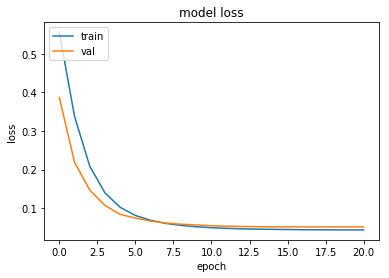

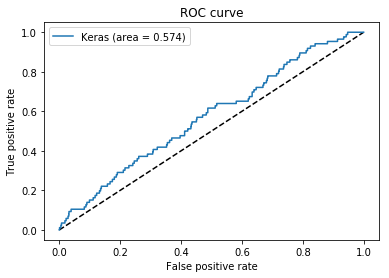

auc :  0.5735731448546983
recall :  0.38372093023255816
Saved model to disk
################### trained by 9 and predict 10
Train on 68519 samples, validate on 17130 samples
Epoch 1/40
68519/68519 [==============================] - ETA: 1:24:02 - loss: 0.92 - ETA: 20:50 - loss: 0.8738 - ETA: 10:17 - loss: 0.84 - ETA: 7:25 - loss: 0.8189 - ETA: 5:47 - loss: 0.796 - ETA: 4:43 - loss: 0.776 - ETA: 4:12 - loss: 0.763 - ETA: 3:35 - loss: 0.745 - ETA: 3:08 - loss: 0.731 - ETA: 2:46 - loss: 0.718 - ETA: 2:28 - loss: 0.708 - ETA: 2:14 - loss: 0.699 - ETA: 2:02 - loss: 0.691 - ETA: 1:51 - loss: 0.683 - ETA: 1:43 - loss: 0.676 - ETA: 1:35 - loss: 0.669 - ETA: 1:28 - loss: 0.663 - ETA: 1:22 - loss: 0.657 - ETA: 1:17 - loss: 0.652 - ETA: 1:14 - loss: 0.648 - ETA: 1:09 - loss: 0.643 - ETA: 1:05 - loss: 0.638 - ETA: 1:01 - loss: 0.634 - ETA: 57s - loss: 0.628 - ETA: 54s - loss: 0.62 - ETA: 51s - loss: 0.61 - ETA: 48s - loss: 0.61 - ETA: 46s - loss: 0.61 - ETA: 44s - loss: 0.60 - ETA: 42s - loss: 0.6

68519/68519 [==============================] - ETA: 5s - loss: 0.035 - ETA: 4s - loss: 0.046 - ETA: 5s - loss: 0.043 - ETA: 4s - loss: 0.043 - ETA: 4s - loss: 0.043 - ETA: 4s - loss: 0.044 - ETA: 4s - loss: 0.044 - ETA: 4s - loss: 0.044 - ETA: 4s - loss: 0.044 - ETA: 4s - loss: 0.045 - ETA: 4s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.047 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.047 - ETA: 3s - loss: 0.047 - ETA: 3s - loss: 0.047 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.045 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 3s - loss: 0.046 - ETA: 2s - loss: 0.046 - ETA: 2s - loss: 0.046 - ETA: 2s - loss: 0.046 - ETA: 2s - loss: 0.046 - ETA: 2s - loss: 0.046 - ETA: 2s - loss: 0.047 - ETA: 2s - loss: 0.046 - ETA: 2s - loss: 0.046 - ETA: 2s - loss: 0.046 - ETA: 2s - loss: 0

68519/68519 [==============================] - ETA: 4s - loss: 0.055 - ETA: 4s - loss: 0.047 - ETA: 4s - loss: 0.040 - ETA: 3s - loss: 0.039 - ETA: 4s - loss: 0.036 - ETA: 3s - loss: 0.035 - ETA: 3s - loss: 0.033 - ETA: 3s - loss: 0.033 - ETA: 3s - loss: 0.033 - ETA: 3s - loss: 0.033 - ETA: 3s - loss: 0.034 - ETA: 3s - loss: 0.034 - ETA: 3s - loss: 0.036 - ETA: 3s - loss: 0.036 - ETA: 3s - loss: 0.038 - ETA: 3s - loss: 0.037 - ETA: 3s - loss: 0.039 - ETA: 3s - loss: 0.040 - ETA: 3s - loss: 0.039 - ETA: 3s - loss: 0.038 - ETA: 3s - loss: 0.038 - ETA: 3s - loss: 0.038 - ETA: 3s - loss: 0.040 - ETA: 3s - loss: 0.039 - ETA: 3s - loss: 0.040 - ETA: 3s - loss: 0.040 - ETA: 3s - loss: 0.040 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.042 - ETA: 2s - loss: 0.041 - ETA: 2s - loss: 0.041 - ETA: 2s - loss: 0.041 - ETA: 2s - loss: 0.041 - ETA: 2s - loss: 0.041 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0.040 - ETA: 2s - loss: 0

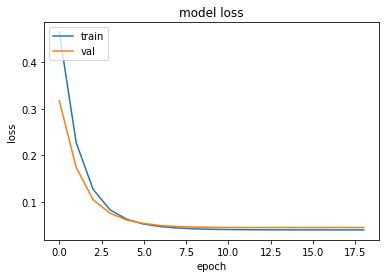

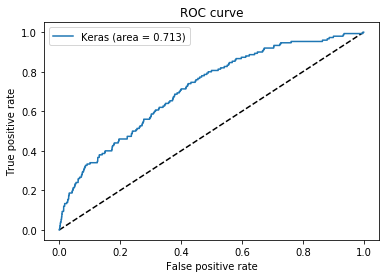

auc :  0.7127186204297022
recall :  0.49333333333333335
Saved model to disk
################### trained by 10 and predict 11
Train on 180420 samples, validate on 45106 samples
Epoch 1/40
180420/180420 [==============================] - ETA: 3:44:20 - loss: 0.69 - ETA: 1:14:46 - loss: 0.69 - ETA: 37:20 - loss: 0.6902 - ETA: 24:51 - loss: 0.68 - ETA: 18:37 - loss: 0.68 - ETA: 13:55 - loss: 0.68 - ETA: 11:42 - loss: 0.67 - ETA: 10:05 - loss: 0.67 - ETA: 8:31 - loss: 0.6728 - ETA: 7:37 - loss: 0.670 - ETA: 6:54 - loss: 0.667 - ETA: 6:18 - loss: 0.664 - ETA: 5:38 - loss: 0.661 - ETA: 5:13 - loss: 0.658 - ETA: 4:52 - loss: 0.655 - ETA: 4:33 - loss: 0.653 - ETA: 4:17 - loss: 0.650 - ETA: 4:02 - loss: 0.648 - ETA: 3:49 - loss: 0.645 - ETA: 3:37 - loss: 0.642 - ETA: 3:23 - loss: 0.639 - ETA: 3:13 - loss: 0.636 - ETA: 3:05 - loss: 0.634 - ETA: 2:57 - loss: 0.631 - ETA: 2:49 - loss: 0.629 - ETA: 2:42 - loss: 0.626 - ETA: 2:34 - loss: 0.623 - ETA: 2:28 - loss: 0.621 - ETA: 2:23 - loss: 0.618 - ETA

180420/180420 [==============================] - ETA: 28s - loss: 0.05 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.04 - ETA: 13s - loss: 0.04 - ETA: 12s - loss: 0.04 - ETA: 12s - loss: 0.04 - ETA: 12s - loss: 0.04 - ETA: 12s - loss: 0.04 - ETA: 12s - loss: 0.04 - ETA: 12s - loss: 0.04 - ETA: 12s - loss: 0.04 - ETA: 12s - loss: 0.04 - ETA: 12s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 11s - loss: 0.04 - ETA: 10s - loss: 0.04 - ETA: 10s - loss: 0.04 - ETA: 10s - loss: 0.04 - ETA: 10s - loss

180420/180420 [==============================] - ETA: 28s - loss: 0.04 - ETA: 16s - loss: 0.02 - ETA: 15s - loss: 0.02 - ETA: 15s - loss: 0.03 - ETA: 14s - loss: 0.03 - ETA: 14s - loss: 0.03 - ETA: 14s - loss: 0.03 - ETA: 14s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 10s - loss: 0.03 - ETA: 10s - loss: 0.03 - ETA: 10s - loss

180420/180420 [==============================] - ETA: 29s - loss: 0.02 - ETA: 16s - loss: 0.04 - ETA: 15s - loss: 0.04 - ETA: 15s - loss: 0.04 - ETA: 14s - loss: 0.04 - ETA: 14s - loss: 0.04 - ETA: 14s - loss: 0.04 - ETA: 13s - loss: 0.04 - ETA: 13s - loss: 0.04 - ETA: 13s - loss: 0.04 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.04 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss

180420/180420 [==============================] - ETA: 24s - loss: 0.02 - ETA: 15s - loss: 0.03 - ETA: 14s - loss: 0.03 - ETA: 14s - loss: 0.04 - ETA: 14s - loss: 0.04 - ETA: 14s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.02 - ETA: 12s - loss: 0.02 - ETA: 11s - loss: 0.02 - ETA: 11s - loss: 0.02 - ETA: 11s - loss: 0.02 - ETA: 11s - loss: 0.02 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 11s - loss

180420/180420 [==============================] - ETA: 22s - loss: 0.02 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 14s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 13s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.03 - ETA: 12s - loss

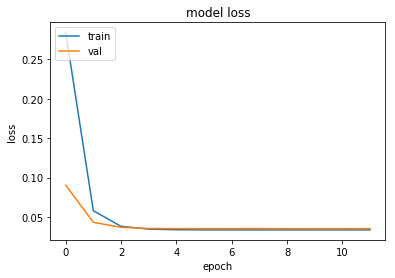

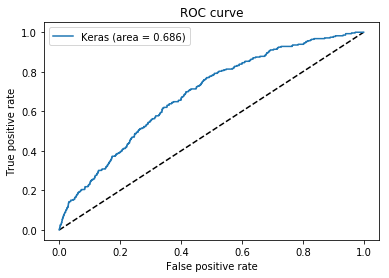

auc :  0.6855855229187584
recall :  0.12544802867383512
Saved model to disk
################### trained by 11 and predict 12
Train on 124694 samples, validate on 31174 samples
Epoch 1/40
124694/124694 [==============================] - ETA: 2:54:14 - loss: 0.75 - ETA: 57:58 - loss: 0.7497 - ETA: 28:53 - loss: 0.73 - ETA: 19:12 - loss: 0.72 - ETA: 14:21 - loss: 0.71 - ETA: 11:26 - loss: 0.70 - ETA: 9:30 - loss: 0.6976 - ETA: 8:06 - loss: 0.689 - ETA: 7:04 - loss: 0.681 - ETA: 6:15 - loss: 0.675 - ETA: 5:36 - loss: 0.669 - ETA: 5:05 - loss: 0.663 - ETA: 4:38 - loss: 0.658 - ETA: 4:16 - loss: 0.653 - ETA: 3:56 - loss: 0.648 - ETA: 3:34 - loss: 0.642 - ETA: 3:20 - loss: 0.637 - ETA: 3:08 - loss: 0.633 - ETA: 2:57 - loss: 0.629 - ETA: 2:44 - loss: 0.624 - ETA: 2:35 - loss: 0.620 - ETA: 2:27 - loss: 0.616 - ETA: 2:20 - loss: 0.612 - ETA: 2:14 - loss: 0.609 - ETA: 2:08 - loss: 0.605 - ETA: 2:02 - loss: 0.602 - ETA: 1:57 - loss: 0.599 - ETA: 1:52 - loss: 0.595 - ETA: 1:48 - loss: 0.592 - ETA: 

124694/124694 [==============================] - ETA: 11s - loss: 0.07 - ETA: 12s - loss: 0.05 - ETA: 11s - loss: 0.06 - ETA: 11s - loss: 0.06 - ETA: 11s - loss: 0.06 - ETA: 11s - loss: 0.06 - ETA: 11s - loss: 0.05 - ETA: 11s - loss: 0.05 - ETA: 10s - loss: 0.05 - ETA: 10s - loss: 0.05 - ETA: 10s - loss: 0.05 - ETA: 10s - loss: 0.05 - ETA: 10s - loss: 0.05 - ETA: 10s - loss: 0.05 - ETA: 10s - loss: 0.05 - ETA: 10s - loss: 0.05 - ETA: 9s - loss: 0.0565 - ETA: 9s - loss: 0.057 - ETA: 9s - loss: 0.056 - ETA: 9s - loss: 0.055 - ETA: 9s - loss: 0.055 - ETA: 9s - loss: 0.055 - ETA: 9s - loss: 0.055 - ETA: 9s - loss: 0.055 - ETA: 9s - loss: 0.054 - ETA: 9s - loss: 0.053 - ETA: 9s - loss: 0.054 - ETA: 9s - loss: 0.054 - ETA: 9s - loss: 0.053 - ETA: 9s - loss: 0.054 - ETA: 9s - loss: 0.053 - ETA: 9s - loss: 0.053 - ETA: 8s - loss: 0.054 - ETA: 8s - loss: 0.054 - ETA: 8s - loss: 0.054 - ETA: 8s - loss: 0.054 - ETA: 8s - loss: 0.055 - ETA: 8s - loss: 0.054 - ETA: 8s - loss: 0.054 - ETA: 8s - loss

Epoch 6/40
124694/124694 [==============================] - ETA: 15s - loss: 0.02 - ETA: 11s - loss: 0.02 - ETA: 13s - loss: 0.03 - ETA: 14s - loss: 0.02 - ETA: 12s - loss: 0.02 - ETA: 11s - loss: 0.03 - ETA: 11s - loss: 0.03 - ETA: 10s - loss: 0.03 - ETA: 10s - loss: 0.03 - ETA: 10s - loss: 0.03 - ETA: 9s - loss: 0.0371 - ETA: 9s - loss: 0.036 - ETA: 9s - loss: 0.035 - ETA: 9s - loss: 0.035 - ETA: 9s - loss: 0.034 - ETA: 9s - loss: 0.033 - ETA: 9s - loss: 0.032 - ETA: 9s - loss: 0.032 - ETA: 9s - loss: 0.032 - ETA: 9s - loss: 0.032 - ETA: 9s - loss: 0.032 - ETA: 9s - loss: 0.032 - ETA: 9s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.031 - ETA: 8s - loss: 0.031 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 7s - loss: 0.032 - ETA: 7s - loss: 0.032 - ETA: 7s - loss: 0.032 - ETA

124694/124694 [==============================] - ETA: 12s - loss: 0.04 - ETA: 12s - loss: 0.03 - ETA: 12s - loss: 0.02 - ETA: 10s - loss: 0.02 - ETA: 9s - loss: 0.0244 - ETA: 9s - loss: 0.023 - ETA: 9s - loss: 0.022 - ETA: 10s - loss: 0.02 - ETA: 9s - loss: 0.0250 - ETA: 9s - loss: 0.028 - ETA: 9s - loss: 0.028 - ETA: 9s - loss: 0.026 - ETA: 9s - loss: 0.026 - ETA: 9s - loss: 0.027 - ETA: 9s - loss: 0.027 - ETA: 9s - loss: 0.026 - ETA: 9s - loss: 0.028 - ETA: 8s - loss: 0.028 - ETA: 8s - loss: 0.028 - ETA: 8s - loss: 0.028 - ETA: 8s - loss: 0.029 - ETA: 8s - loss: 0.029 - ETA: 8s - loss: 0.030 - ETA: 8s - loss: 0.030 - ETA: 8s - loss: 0.030 - ETA: 8s - loss: 0.030 - ETA: 8s - loss: 0.030 - ETA: 8s - loss: 0.030 - ETA: 8s - loss: 0.031 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.032 - ETA: 8s - loss: 0.033 - ETA: 7s - loss: 0.032 - ETA: 7s - loss: 0.033 - ETA: 7s - loss: 0.033 - ETA: 7s - los

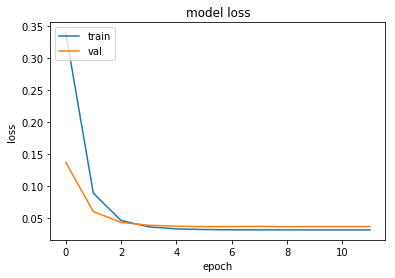

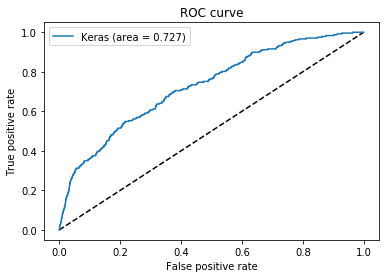

auc :  0.7269033194843294
recall :  0.3037974683544304
Saved model to disk
##################DONE##############


In [12]:
i = 0
f1_score = []
re_score = []
pr_score = []
auc_score = []
fpr_score = []
tpr_score = []
while i<=4:
    raw02 = raw[((raw.month==(s+i))|(raw.month==(s+1+i)))]
    raw02 = raw02.drop_duplicates()
    train = raw02[raw02.month==(s+i)].drop("month",axis=1)
    test = raw02[raw02.month==(s+1+i)].drop("month",axis=1)
    train["rating"] = 1
    test["rat"] = 1
    item_list = train.item.value_counts()[(train.item.value_counts()>=10)].index
    train = pd.pivot_table(train, values="rating", index=["item"], columns=["user"], aggfunc=sum)
    train = train.unstack().reset_index().fillna(0)
    train.columns = ["user","item","rating"]
    train = train[train.item.isin(item_list)]
    train.rating = train.rating.astype("int")
    train["idx"]= "train"
    train = train.merge(I_RFM, on="item", how="left").fillna(0)
    train = train.merge(U_RFM, on="user", how="left").fillna(0)
    test = train.merge(test, how = "left", on=["user","item"]).fillna(0)
    test = test.drop(["item_R", "item_F", "item_M", "user_R", "user_F", "user_M"], axis=1)
    test = test[(test.rating!=1)]
    test["rating"] = test.rat.astype("int")
    test = test.drop("rat",axis=1)
    test["idx"] = "test"
    test = test.merge(I_RFM, on="item", how="left").fillna(0)
    test = test.merge(U_RFM, on="user", how="left").fillna(0)
    raw02 = pd.concat([train,test])
    raw02_org = pd.concat([train,test])
    raw02["user"] = raw02.user.astype("category").cat.codes.values
    raw02["item"] = raw02.item.astype("category").cat.codes.values
    train = raw02[raw02.idx=="train"]
    train = train.drop("idx",axis=1)
    test = raw02[raw02.idx=="test"]
    test = test.drop("idx",axis=1)
    n_user = train.user.nunique()
    n_item = train.item.nunique()

    # model
    item_R_input = Input(shape=[1], name="item_R")
    item_R_dense = Dense(rfm_dense1)(item_R_input)
    item_R_dense = BatchNormalization()(item_R_dense)
    item_R_dense = Dense(factors)(item_R_dense)
    item_R_dense = BatchNormalization()(item_R_dense)
    item_R_out = Activation("relu")(item_R_dense)
    
    item_F_input = Input(shape=[1], name="item_F")
    item_F_dense = Dense(rfm_dense1)(item_F_input)
    item_F_dense = BatchNormalization()(item_F_dense)
    item_F_dense = Dense(factors)(item_F_dense)
    item_F_dense = BatchNormalization()(item_F_dense)
    item_F_out = Activation("relu")(item_F_dense)
    
    item_M_input = Input(shape=[1], name="item_M")
    item_M_dense = Dense(rfm_dense1)(item_M_input)
    item_M_dense = BatchNormalization()(item_M_dense)
    item_M_dense = Dense(factors)(item_M_dense)
    item_M_dense = BatchNormalization()(item_M_dense)
    item_M_out = Activation("relu")(item_M_dense)
    
    user_R_input = Input(shape=[1], name="user_R")
    user_R_dense = Dense(rfm_dense1)(user_R_input)
    user_R_dense = BatchNormalization()(user_R_dense)
    user_R_dense = Dense(factors)(user_R_dense)
    user_R_dense = BatchNormalization()(user_R_dense)
    user_R_out = Activation("relu")(user_R_dense)
    
    user_F_input = Input(shape=[1], name="user_F")
    user_F_dense = Dense(rfm_dense1)(user_F_input)
    user_F_dense = BatchNormalization()(user_F_dense)
    user_F_dense = Dense(factors)(user_F_dense)
    user_F_dense = BatchNormalization()(user_F_dense)
    user_F_out = Activation("relu")(user_F_dense)
    
    user_M_input = Input(shape=[1], name="user_M")
    user_M_dense = Dense(rfm_dense1)(user_M_input)
    user_M_dense = BatchNormalization()(user_M_dense)
    user_M_dense = Dense(factors)(user_M_dense)
    user_M_dense = BatchNormalization()(user_M_dense)
    user_M_out = Activation("relu")(user_M_dense)
    
    user_input = Input(shape=[1], name="USER")
    user_em = Embedding(n_user+1, user_factor, name="USER_Embed")(user_input)
    user_vec = Flatten(name="Flatten_user")(user_em)
    
    item_input = Input(shape=[1], name="ITEM")
    item_em = Embedding(n_item+1, item_factor, name="ITEM_Embed")(item_input)
    item_vec = Flatten(name="Flatten_item")(item_em)
    
    item_concatenated = concatenate([item_R_out, item_F_out, item_M_out, item_vec], axis=-1)
    user_concatenated = concatenate([user_R_out, user_F_out, user_M_out, user_vec], axis=-1)
    
    prod = Dot(name="Dot-Product", axes=1)([item_concatenated, user_concatenated])
    prod = Dense(dot_dense1)(prod)
    prod = BatchNormalization()(prod)
    prod = Dense(dot_dense2)(prod)
    out = Dense(1, activation="sigmoid")(prod)
    
    model = Model([user_input, item_input, item_R_input, item_F_input, item_M_input, user_R_input, user_F_input, user_M_input], out)
    model.compile(optimizer = optimizer, loss = "binary_crossentropy")


    
    print("###################", "trained by", s+i, "and predict", int(s+i)+1)
    
    history = model.fit([train.user, train.item, train.item_R, train.item_F, train.item_M, train.user_R, train.user_F, train.user_M],
                        train.rating, batch_size = BATCH_SIZE,
                        epochs=epo, verbose=1, validation_split= 0.2, callbacks = [early_stop]) 
    
    y_pred = model.predict([test.user, test.item, test.item_R, test.item_F, test.item_M, test.user_R, test.user_F, test.user_M])
    
    # summarize history for loss
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "val"], loc="upper left")
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(test.rating, y_pred)    
    fpr_score.append(np.array(fpr).mean())
    tpr_score.append(np.array(tpr).mean())
    
    from sklearn.metrics import auc
    auc = auc(fpr, tpr)
    
    auc_score.append(auc)
    
    
    plt.figure(1)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label="Keras (area = {:.3f})".format(auc))
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend(loc="best")
    plt.show()
    
    test["prob"] = model.predict([test.user, test.item, test.item_R, test.item_F, test.item_M, test.user_R, test.user_F, test.user_M])
    test = test.reset_index()
    test = test.drop("index",axis=1)
    test01 = test.groupby("user")["prob"].nlargest(top_n).reset_index()
    test01 = test.iloc[list(test01.iloc[:,1])]
    re = test01.rating.sum() / test.rating.sum()
    pr = test01.rating.sum() / (test.user.nunique() * top_n)
    f1 = 2*(pr*re)  / (pr+re)
    
    print("auc : ",auc)
    print("recall : ",re)
    f1_score.append(f1)
    re_score.append(re)
    pr_score.append(pr)
    
    # save model weight
    model_json = model.to_json()
    with open("model_0227"+str(i)+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model_0227"+str(i)+".h5")
    print("Saved model to disk")
    
    i = i+1

print("##################DONE##############")

In [13]:
print(auc_score, '\n #### mean :', np.array(auc_score).mean())

[0.669554383058785, 0.5735731448546983, 0.7127186204297022, 0.6855855229187584, 0.7269033194843294] 
 #### mean : 0.6736669981492547


In [14]:
print(re_score, '\n #### mean :', np.array(re_score).mean())

[0.26666666666666666, 0.38372093023255816, 0.49333333333333335, 0.12544802867383512, 0.3037974683544304] 
 #### mean : 0.31459328545216475


In [15]:
objects = ('07-08', '08-09', '09-10', '10-11', '11-12')
y_pos = np.arange(len(objects))

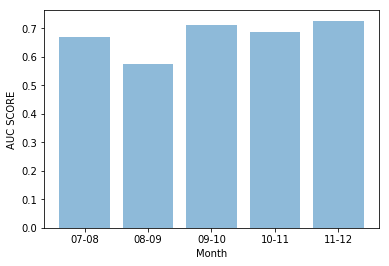

In [16]:
plt.bar(y_pos, auc_score, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('AUC SCORE')
plt.xlabel('Month')
 
plt.show()

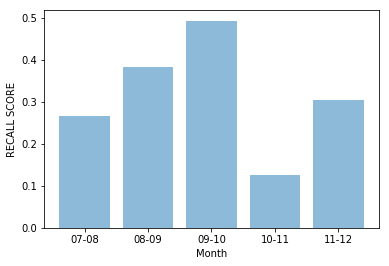

In [17]:
plt.bar(y_pos, re_score, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RECALL SCORE')
plt.xlabel('Month')
 
plt.show()